In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/My\ Drive/eva-04/S12/* 

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S12/')

SHOW PARAMETERS

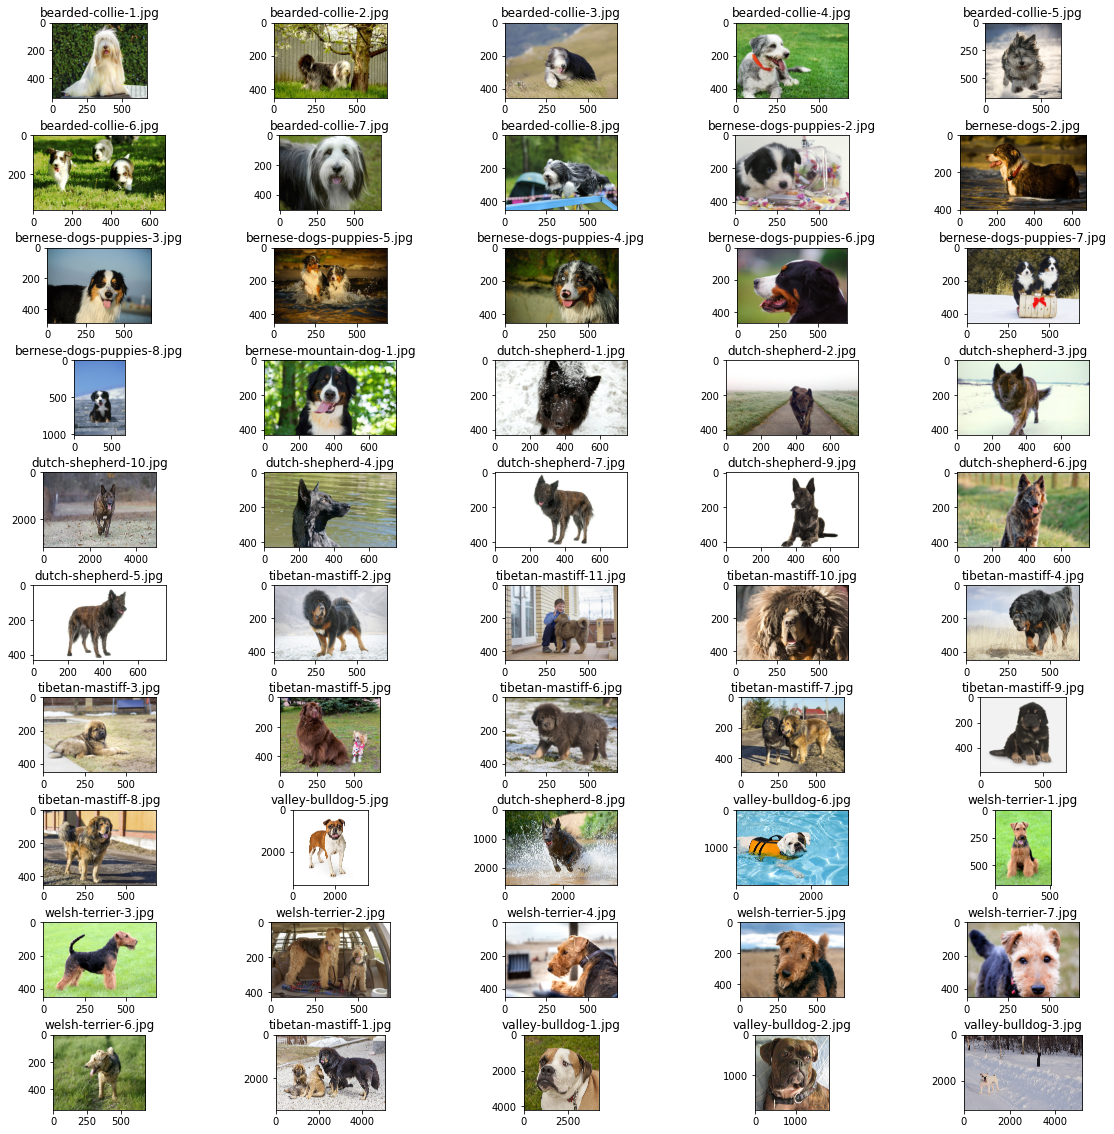

50


In [107]:
#!/usr/bin/python
from os import listdir
from PIL import Image as PImage

def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(img)
    return loadedImages

path = "/content/gdrive/My Drive/eva-04/S12/dog_breeds/"

# your images in an array
imgs = loadImages(path)
#print(type(imgs[1]))
import numpy as np
import cv2
from matplotlib import pyplot as plt
map_image_sizes = {}
_, axs = plt.subplots(10, 5, figsize=(20, 20))
axs = axs.flatten()
image_names = []
for img, ax in zip(imgs, axs):
  h, w = img.size
  name = img.filename.split('/')[7]
  #ax.imshow(img)
  ax.imshow(img)
  ax.title.set_text(name) 
  #print(name)
  map_image_sizes[name] = (h,w)
  image_names.append(name)
  print(name,h,w)

plt.subplots_adjust(hspace=0.5)
plt.show()
print(len(image_names))

READ ANNOTATION JSON FILE

In [111]:
import pandas as pd
path_annotations = "/content/gdrive/My Drive/eva-04/S12/S12_regions_export_json.json"

df = pd.read_json(r'/content/gdrive/My Drive/eva-04/S12/S12_regions_export_json.json')
#name
#size
#[{'shape_attributes': {'name': 'rect', 'x': 192, 'y': 37, 'width': 345, 'height': 490}, 'region_attributes': {'name': 'bearded-collie-1', 'type': 'dog', 'image_quality': {'good': True, 'frontal': True, 'good_illumination': True}}}]
#{'caption': '', 'public_domain': 'no', 'image_...

image_names = df.iloc[0][0:50]
#print(names)
sizes = df.iloc[1][0:50]
#print(attributes)
shape_attributes = df.iloc[2][0:50]
#shape_attributes is array starting with[
#print(shape_attributes)
for idx in range(50):
  shape_attributes = df.iloc[2][0:50]
  map = shape_attributes[0][0] # remove array and take dictionary of json
  x = map['shape_attributes']['x']
  y = map['shape_attributes']['y']
  region_width = map['shape_attributes']['width']
  region_height = map['shape_attributes']['height']
  #normalize 
  image_name = image_names[idx]
  n_x = x / map_image_sizes[image_name][1]
  n_y = y / map_image_sizes[image_name][0]
  n_region_width = region_width / map_image_sizes[image_name][1]
  n_region_height = region_width / map_image_sizes[image_name][0]
  print(x,y,region_width,region_height, n_x, n_y,n_region_width,n_region_height)
  #map_image_sizes['imagename':(height,width)]
  print(map_sizes.get(image_names[idx])[1]) 


192 37 345 490
540
192 37 345 490
452
192 37 345 490
453
192 37 345 490
453
192 37 345 490
675
192 37 345 490
386
192 37 345 490
502
192 37 345 490
453
192 37 345 490
450
192 37 345 490
402
192 37 345 490
489
192 37 345 490
452
192 37 345 490
452
192 37 345 490
465
192 37 345 490
453
192 37 345 490
1012
192 37 345 490
430
192 37 345 490
430
192 37 345 490
430
192 37 345 490
430
192 37 345 490
3213
192 37 345 490
430
192 37 345 490
430
192 37 345 490
430
192 37 345 490
430
192 37 345 490
430
192 37 345 490
451
192 37 345 490
453
192 37 345 490
453
192 37 345 490
451
192 37 345 490
453
192 37 345 490
509
192 37 345 490
453
192 37 345 490
495
192 37 345 490
597
192 37 345 490
453
192 37 345 490
3592
192 37 345 490
2592
192 37 345 490
2000
192 37 345 490
680
192 37 345 490
453
192 37 345 490
429
192 37 345 490
453
192 37 345 490
486
192 37 345 490
453
192 37 345 490
553
192 37 345 490
3474
192 37 345 490
4200
192 37 345 490
1857
192 37 345 490
3276
